# Exploration of Boston Airbnb data

In this notebook, we go through each step of the CRISP-DM process to analyze Boston Airbnb data.

## Business Understanding

To guide our exploration, we used the Boston Airbnb data available through Kaggle and answered the following three questions:

1. What is the most expensive neighborhood in Boston?
2. What area has the most pet-friendly properties?
3. What variables correlate with price?

## Data Understanding

1. Import listings.csv for Boston Airbnb
2. Check top 5 records in the dataset
3. Check number of rows and columns in dataset
4. Check datatype of each column
5. Check percentage of null values for each column

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import listings.csv for Boston Airbnb and check top 5 records

df = pd.read_csv('./listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,2.016090e+13,9/7/16,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,2.016090e+13,9/7/16,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,2.016090e+13,9/7/16,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,2.016090e+13,9/7/16,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,2.016090e+13,9/7/16,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [2]:
# Check number of rows and columns in dataset

num_rows = df.shape[0]
num_cols = df.shape[1]

print('num_rows:', num_rows)
print('num_cols:', num_cols)

num_rows: 3585
num_cols: 95


In [3]:
# List datatypes and counts of null values for each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   float64
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [4]:
# Calculate percentage of null values for each column and display column names where percentage of null values > 0

nan_percent = (df.isnull().sum()/num_rows).sort_values(ascending=False)
nan_percent[nan_percent>0]

has_availability                1.000000
license                         1.000000
neighbourhood_group_cleansed    1.000000
jurisdiction_names              1.000000
square_feet                     0.984379
monthly_price                   0.752301
weekly_price                    0.751185
security_deposit                0.625662
notes                           0.550907
interaction                     0.433473
access                          0.415342
neighborhood_overview           0.394700
host_about                      0.365132
transit                         0.359833
house_rules                     0.332497
cleaning_fee                    0.308787
space                           0.294840
review_scores_accuracy          0.229568
review_scores_location          0.229289
review_scores_value             0.229010
review_scores_checkin           0.228731
review_scores_communication     0.228173
review_scores_cleanliness       0.228173
review_scores_rating            0.226778
reviews_per_mont

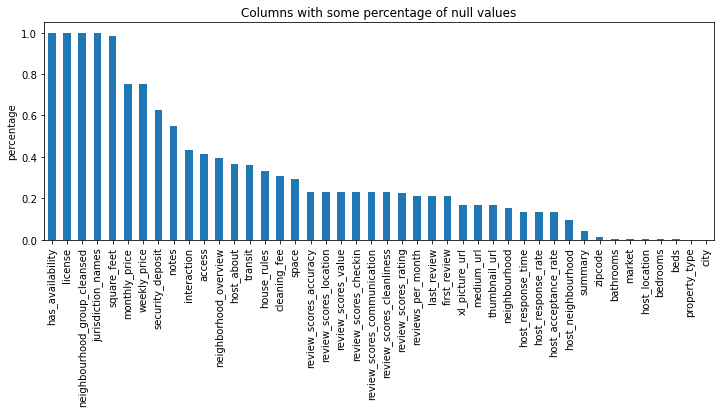

In [5]:
# Plot columns with non-zero percentage of null values

nan_percent[nan_percent>0].plot(kind='bar', ylabel='percentage', figsize=(12,4))
plt.title("Columns with some percentage of null values");


## Data Preparation

1. Remove any rows or columns that only contain null values or columns that all contain same value
2. Remove unnecessary variables
3. Convert object variables to numeric and boolean values where appropriate to make them usable

In [6]:
# Remove rows or columns that only contain null values

df = df.dropna(how='all', axis=0)
df = df.dropna(how='all', axis=1)

# Remove columns that contain same value in all rows

df = df.drop(df.nunique()[df.nunique()==1].index, axis=1)


In [7]:
# Remove unnecessary variables: ids, urls, thumbnails
# Drop 'weekly_price' and 'monthly_price' because often null and similar concept captured by 'price'
# Drop 'neighbourhood' because covered by 'neighbourhood_cleansed'

df_cleaned = df.drop(['id', 'listing_url', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_thumbnail_url', 'host_picture_url', 'weekly_price', 'monthly_price', 'neighbourhood'], axis=1)


In [8]:
# Convert dollar values to floats, set values to 0 if null

col_dollars = ['price', 'security_deposit', 'cleaning_fee', 'extra_people']

for col in col_dollars:
    df_cleaned[col] = df_cleaned[col].replace(to_replace='[/$,]', value='', regex=True)
    df_cleaned[col] = df_cleaned[col].fillna(0)
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Convert 't' and 'f' to boolean values

col_bool = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']

for col in col_bool:
    df_cleaned[col] = df_cleaned[col].replace(to_replace='t', value=True, regex=False)
    df_cleaned[col] = df_cleaned[col].replace(to_replace='f', value=False, regex=False)
    df_cleaned[col] = df_cleaned[col].astype('bool')

# Convert percentages to floats

col_perc = ['host_response_rate', 'host_acceptance_rate']

for col in col_perc:
    df_cleaned[col] = df_cleaned[col].replace(to_replace='[\%]', value='', regex=True)
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

df_cleaned.shape

(3585, 69)

## Evaluation

### Question 1: What is the most expensive neighborhood in Boston?

In [9]:
# Check possible values for neighbourhood_cleansed

count_vals_neighbourhood_cleansed = df_cleaned.neighbourhood_cleansed.value_counts()
print(count_vals_neighbourhood_cleansed)

# Check percentage of null values for neighbourhood_cleansed

neighbourhood_cleaned_null_perc = df_cleaned['neighbourhood_cleansed'].isnull().sum()/df_cleaned.shape[0]
print('% null values in neighbourhood_cleansed: {}'.format(neighbourhood_cleaned_null_perc))

Jamaica Plain              343
South End                  326
Back Bay                   302
Fenway                     290
Dorchester                 269
Allston                    260
Beacon Hill                194
Brighton                   185
South Boston               174
Downtown                   172
East Boston                150
Roxbury                    144
North End                  143
Mission Hill               124
Charlestown                111
South Boston Waterfront     83
Chinatown                   71
Roslindale                  56
West End                    49
West Roxbury                46
Hyde Park                   31
Mattapan                    24
Bay Village                 24
Longwood Medical Area        9
Leather District             5
Name: neighbourhood_cleansed, dtype: int64
% null values in neighbourhood_cleansed: 0.0


In [10]:
# Check min and max price for listings

max_price = df_cleaned.price.max()
min_price = df_cleaned.price.min()
print('Price ranges from ${} to ${}'.format(min_price, max_price))

# Check percentage of null values for price

price_null_perc = df_cleaned['neighbourhood_cleansed'].isnull().sum()/df_cleaned.shape[0]
print('% null prices: {}'.format(price_null_perc))

Price ranges from $10.0 to $4000.0
% null prices: 0.0


In [11]:
# Calculate average price for each neighborhood

df_q1 = df_cleaned[['neighbourhood_cleansed', 'price']].groupby(['neighbourhood_cleansed']).mean().sort_values('price', ascending=False)
print(df_q1)

                              price
neighbourhood_cleansed             
South Boston Waterfront  306.060241
Bay Village              266.833333
Leather District         253.600000
Back Bay                 240.950331
Downtown                 236.459302
Chinatown                232.352113
Beacon Hill              224.443299
Fenway                   220.393103
West End                 209.591837
South End                204.349693
Charlestown              198.045045
North End                195.678322
South Boston             187.609195
Roxbury                  146.333333
Jamaica Plain            138.478134
Longwood Medical Area    138.444444
Mission Hill             121.967742
East Boston              119.153333
Brighton                 118.767568
Allston                  112.307692
West Roxbury             107.108696
Roslindale                98.428571
Dorchester                91.639405
Hyde Park                 86.548387
Mattapan                  75.125000


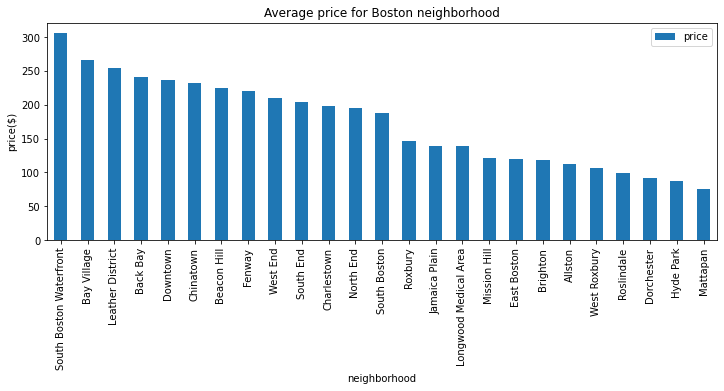

In [12]:
# Plot neighborhood by average price in listing

df_q1.plot(kind='bar', xlabel='neighborhood', ylabel='price($)', figsize=(12,4))
plt.title("Average price for Boston neighborhood");


Based on average price for listings within each neighborhood, the most expensive neighborhood in Boston is **South Boston Waterfront** (\$306.06), followed by **Bay Village** (\$266.83) and **Leather District** (\$253.60).

### Question 2: What area has the most pet-friendly properties?

To answer this question, we will be looking at the **neighbourhood_cleansed** and **amenities** columns.
First, let's look at the **amenities** column.

In [13]:
# Look for amenities that mention pets

for i in range(df_cleaned.shape[0]):
    if ('Pet' or 'pet') in df_cleaned['amenities'][i]:
        print(df_cleaned['amenities'][i])


{TV,"Wireless Internet",Kitchen,"Free Parking on Premises","Pets live on this property",Dog(s),Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials,Shampoo,"Laptop Friendly Workspace"}
{TV,Internet,"Wireless Internet","Air Conditioning",Kitchen,"Pets Allowed","Pets live on this property",Dog(s),Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentials,Shampoo,"Lock on Bedroom Door",Hangers,"Hair Dryer",Iron}
{"Cable TV","Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Pets live on this property",Cat(s),Heating,"Family/Kid Friendly","Smoke Detector","Carbon Monoxide Detector",Hangers,Iron}
{TV,Internet,"Wireless Internet","Air Conditioning","Free Parking on Premises",Breakfast,"Pets live on this property",Dog(s),"Indoor Fireplace",Heating,Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials,Shampoo,Ha

We can see there are 2 amenities that mention pets, specifically, **Pets Allowed** and **Pets live on this property**.
We are interested in **Pets Allowed**.

In [14]:
# Add column indicating whether pets are allowed

df_cleaned['pets_allowed'] = df_cleaned['amenities'].str.contains('Pets Allowed', regex=False)

In [15]:
# Count number of listings within each neighbourhood that allows pets

df_q2 = df_cleaned[['neighbourhood_cleansed', 'pets_allowed']].groupby(['neighbourhood_cleansed']).sum().sort_values('pets_allowed', ascending=False)
print(df_q2)

                         pets_allowed
neighbourhood_cleansed               
Jamaica Plain                      62
South End                          55
Fenway                             40
North End                          39
Back Bay                           39
South Boston                       26
Brighton                           26
Dorchester                         24
Downtown                           23
East Boston                        23
Allston                            21
Charlestown                        18
Beacon Hill                        18
South Boston Waterfront            16
Mission Hill                       12
Roxbury                            11
Roslindale                          8
West End                            8
Chinatown                           6
West Roxbury                        5
Hyde Park                           3
Mattapan                            2
Longwood Medical Area               1
Leather District                    0
Bay Village 

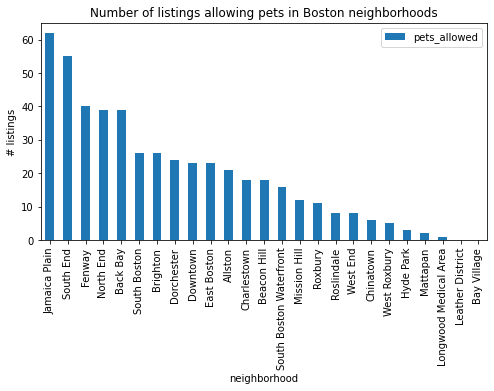

In [16]:
# Plot neighborhood by number of listings allowing pets

df_q2.plot(kind='bar', xlabel='neighborhood', ylabel='# listings', figsize=(8,4))
plt.title("Number of listings allowing pets in Boston neighborhoods");


Based on the number of pet-friendly listings, the neighborhoods with the most pet-friendly listings are **Jamaica Plain** (62 listings), **South End** (55 listings), followed by **Fenway** (40 listings).

However, since the number of total available listings varies depending on the neighborhood, let's normalize this data by calculating the percentage of listings within each neighborhood that allow pets.

In [17]:
# Calculate percentage of listings within each neighbourhood that allow pets

neighborhoods = df_cleaned.neighbourhood_cleansed.unique()
df_pets_perc = pd.DataFrame()

for n in neighborhoods:
    
    num_listings = len(df_cleaned[df_cleaned['neighbourhood_cleansed']== n])
    num_listings_pets = df_cleaned.groupby('neighbourhood_cleansed')['pets_allowed'].sum()[n]
    perc_pets = num_listings_pets / num_listings
    
    df_pets_perc = pd.concat([df_pets_perc, pd.DataFrame({'neighbourhood_cleansed': [n], 'percent_pets_allowed': [perc_pets]})], ignore_index=True)

df_pets_perc = df_pets_perc.sort_values('percent_pets_allowed', ascending=False)
df_pets_perc.set_index('neighbourhood_cleansed', drop=True, inplace=True)
print(df_pets_perc)

                         percent_pets_allowed
neighbourhood_cleansed                       
North End                            0.272727
South Boston Waterfront              0.192771
Jamaica Plain                        0.180758
South End                            0.168712
West End                             0.163265
Charlestown                          0.162162
East Boston                          0.153333
South Boston                         0.149425
Roslindale                           0.142857
Brighton                             0.140541
Fenway                               0.137931
Downtown                             0.133721
Back Bay                             0.129139
Longwood Medical Area                0.111111
West Roxbury                         0.108696
Hyde Park                            0.096774
Mission Hill                         0.096774
Beacon Hill                          0.092784
Dorchester                           0.089219
Chinatown                         

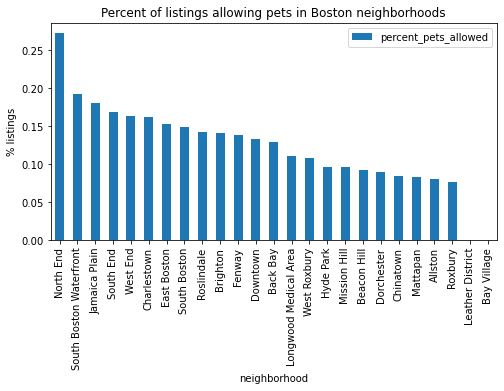

In [18]:
# Plot neighborhood by percentage of listings allowing pets

df_pets_perc.plot(kind='bar', xlabel='neighborhood', ylabel='% listings', figsize=(8,4))
plt.title("Percent of listings allowing pets in Boston neighborhoods");


Based on the percentage of pet-friendly listings within each neighborhood, the neighborhoods with the most pet-friendly listings are **North End**, **South Boston Waterfront**, followed by **Jamaica Plain**.

### Question 3: What variables correlate well to price?

First, we explore a correlation matrix to see what variables are related to price

In [19]:
# Correlation matrix considering only quantitative variables

print(df_cleaned.corr()['price'].sort_values(ascending=False))

price                               1.000000
square_feet                         0.447795
accommodates                        0.437756
bedrooms                            0.385298
beds                                0.370013
cleaning_fee                        0.299320
bathrooms                           0.248234
guests_included                     0.211806
latitude                            0.196270
review_scores_location              0.193928
host_total_listings_count           0.171930
host_listings_count                 0.171930
longitude                           0.165621
calculated_host_listings_count      0.161855
security_deposit                    0.152004
review_scores_cleanliness           0.146548
require_guest_phone_verification    0.134929
availability_30                     0.132100
availability_60                     0.112577
review_scores_rating                0.105651
availability_90                     0.098526
pets_allowed                        0.071638
is_locatio

Can also visualize this as a heatmap. Here we limit to the top 10 variables with the highest correlation to price for easier viewing.

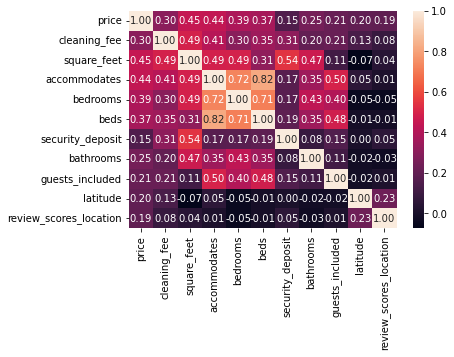

In [20]:
# Heatmap to visualize, limit to 10 variables with highest correlation to price

df_cleaned_trunc = df_cleaned[['price', 'cleaning_fee', 'square_feet', 'accommodates', 'bedrooms', 'beds', 'security_deposit', 'bathrooms', 'guests_included', 'latitude', 'review_scores_location']]
sns.heatmap(df_cleaned_trunc.corr(), annot=True, fmt=".2f");


Next, we explore some categorical variables and how they relate to price. Specifically, we look at **property_type**, **room_type**, and **bed_type**.

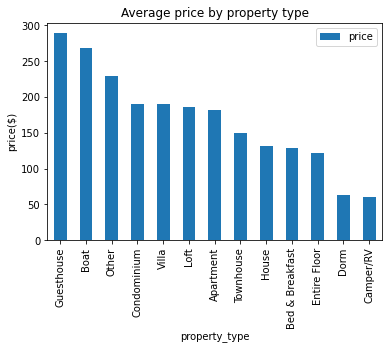

In [21]:
# Plot how property_type relate to price

df_property_type = df_cleaned[['property_type', 'price']].groupby(['property_type']).mean().sort_values('price', ascending=False)

df_property_type.plot(kind='bar', ylabel='price($)')
plt.title("Average price by property type");


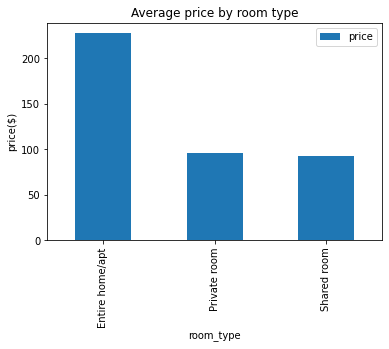

In [22]:
# Plot how room_type relate to price

df_room_type = df_cleaned[['room_type', 'price']].groupby(['room_type']).mean().sort_values('price', ascending=False)

df_room_type.plot(kind='bar', ylabel='price($)')
plt.title("Average price by room type");


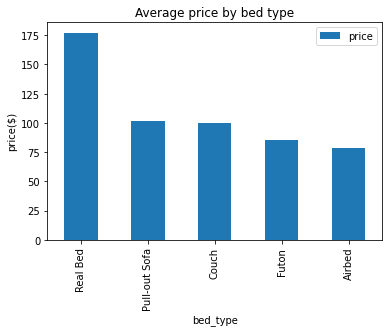

In [23]:
# Plot how bed_type relate to price

df_bed_type = df_cleaned[['bed_type', 'price']].groupby(['bed_type']).mean().sort_values('price', ascending=False)

df_bed_type.plot(kind='bar', ylabel='price($)')
plt.title("Average price by bed type");
